In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
from scipy.fftpack import fft
from scipy import signal
from sys import getsizeof
import torch
%matplotlib inline

In [2]:
meta_test = pd.read_csv('./VSB_unpacked/metadata_test.csv')
meta_train = pd.read_csv('./VSB_unpacked/metadata_train.csv')
df_train = pd.read_parquet('VSB_unpacked/train.parquet')

signal0 = df_train.loc[:,'0']
signal1 = df_train.loc[:,'1']
signal2 = df_train.loc[:,'2']

In [3]:
signals = [signal0, signal1, signal2]

In [4]:
type(signals)

list

In [5]:
Zxx_s = np.array([Zxx for _, _, Zxx in 
                map(lambda x: signal.stft(x, nperseg=1024, noverlap=512) , signals)])

In [6]:
Zxx_s.shape

(3, 513, 1564)

In [7]:
type(Zxx_s[0,1,1])

numpy.complex64

In [8]:
np.amin(Zxx_s[0,:,:])

(-22.215366+0j)

In [9]:
#sample_rate = 40 * 10**6
N = 800_000
#time = np.arange(N) / float(sample_rate)
_, _, Zxx = signal.stft(signal0, nperseg=1024, noverlap=512) #noverlap = hop length
#Zxx = signal.stft(signal0, sample_rate, nperseg=1000)

In [15]:
Zxx.shape

(513, 1564)

In [13]:
t = 20*10**-3
f = 40*10**6

In [14]:
time = t*20/t[-1] # 20 ms, duration of recording
freq = f*20/f[-1] # 40 MHz sampling means highest frequency represented is 20 MHz

TypeError: 'float' object is not subscriptable

In [205]:
Zxx.shape

(513, 1564)

In [206]:
max(Zxx)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
Zxx.shape

(513, 1564)

In [20]:
freq = np.linspace(0,20,513)
time = np.linspace(0,20,1564)

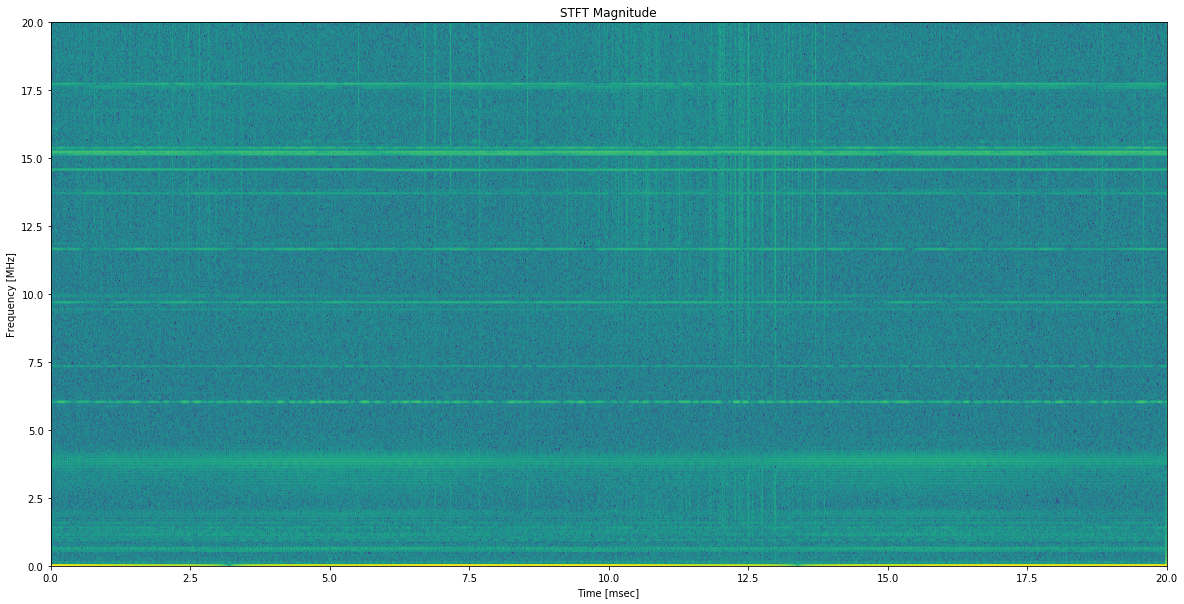

In [21]:
plt.figure(figsize=(20,10))
plt.pcolormesh(time, freq, 10*np.log10(np.abs(Zxx)), cmap='viridis')

plt.title('STFT Magnitude')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [msec]', )
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
signal.spectrogram(time, freq, 10*np.log10(np.abs(Zxx)), cmap='viridis')

plt.title('STFT Magnitude')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [msec]', )
plt.show()

In [97]:
foo = signal.stft(signal0, nperseg=1024, noverlap=512)

#Zxx[0] = signal.stft(i, nperseg=1024, noverlap=512) #noverlap = hop length

In [111]:
torch.tensor(signal0.astype(float))

tensor([18., 18., 17.,  ..., 17., 19., 17.])

In [102]:
foo = np.asarray(signal0)

In [108]:
foo = foo.reshape([-1,1])

In [109]:
foo.dim

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [165]:
g = torch.stft(torch.tensor(signal0.astype(float)), n_fft=1024, )

In [166]:
g.shape

torch.Size([513, 3126, 2])

In [167]:
realg = np.asarray(g[:,:,[0]]).astype(float)

In [168]:
realg.shape

(513, 3126, 1)

In [169]:
res = realg.reshape(513,-1)

In [170]:
type(res[5,5])

numpy.float64

In [171]:
res.shape

(513, 3126)

/Users/juliansweet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



TypeError: Dimensions of C (513, 3126) are incompatible with X (1564) and/or Y (513); see help(pcolormesh)

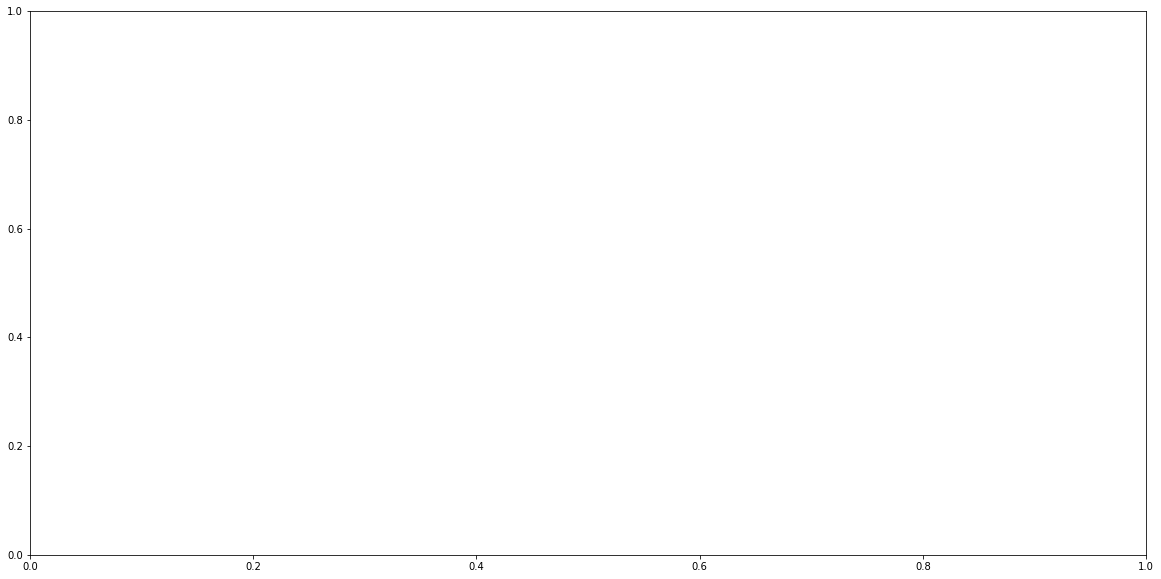

In [173]:
plt.figure(figsize=(20,10))
plt.pcolormesh(time, freq, 10*np.log10(np.abs(res)), cmap='viridis')

plt.title('STFT Magnitude')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [msec]', )
plt.show()